# load data

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new_withmag.npy')

In [13]:
table.shape

(26241654, 10)

In [14]:
vpeak = table[:,1]
zform = table[:,8]
mag = table[:,9]

# 分红移bin计算 zform cdf

## 对红移分bin

In [5]:
print(np.max(zform))
print(np.min(zform))

12.406872085246118
0.2182580231028184


In [7]:
ntemp = 0
for i in range(len(zform)):
    if zform[i] == 0.2182580231028184:
        ntemp = ntemp + 1

In [8]:
ntemp

128

In [9]:
ntemp = 0
for i in range(len(zform)):
    if zform[i] == 12.406872085246118:
        ntemp = ntemp + 1

In [10]:
ntemp

1

### 分100000个红移bin

In [6]:
arr_red = np.arange(100001)
bin_red = 0.21 + 12.2 * arr_red / 100000

In [7]:
bin_red[:20]

array([0.21    , 0.210122, 0.210244, 0.210366, 0.210488, 0.21061 ,
       0.210732, 0.210854, 0.210976, 0.211098, 0.21122 , 0.211342,
       0.211464, 0.211586, 0.211708, 0.21183 , 0.211952, 0.212074,
       0.212196, 0.212318])

In [8]:
bin_red[-20:]

array([12.407682, 12.407804, 12.407926, 12.408048, 12.40817 , 12.408292,
       12.408414, 12.408536, 12.408658, 12.40878 , 12.408902, 12.409024,
       12.409146, 12.409268, 12.40939 , 12.409512, 12.409634, 12.409756,
       12.409878, 12.41    ])

In [9]:
red_bin_mean = 0.5 * (bin_red[1:] + bin_red[:-1])

In [10]:
red_bin_mean

array([ 0.210061,  0.210183,  0.210305, ..., 12.409695, 12.409817,
       12.409939])

# 分mag bin存 vpeak，zform，mag

## 分mag bin

In [15]:
# mag_bin_new = np.arange(-235,-150,1)
mag_bin_new = np.array([-23.5,-23.0, -22.8, -22.7,
       -22.6, -22.5, -22.4, -22.3, -22.2, -22.1, -22. , -21.9, -21.8,
       -21.7, -21.6, -21.5, -21.4, -21.3, -21.2, -21.1, -21.0 , -20.9,
       -20.8, -20.7, -20.6, -20.5, -20.4, -20.3, -20.2, -20.1, -20.0 ,
       -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1,
       -19.0 , -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2,
       -18.1, -18.0 , -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3,
       -17.2, -17.10, -17.0 , -16.9, -16.8, -16.7, -16.6, -16.5, -16.4,
       -16.3, -16.2, -16.10, -16.0 , -15.9, -15.8, -15.7, -15.6, -15.5,
       -15.4, -15.3, -15.20, -15.10])

In [16]:
mag_bin_mean = 0.5 * (mag_bin_new[1:] + mag_bin_new[:-1])

In [17]:
mag_bin_mean.shape

(79,)

In [18]:
mag_bin_mean

array([-23.25, -22.9 , -22.75, -22.65, -22.55, -22.45, -22.35, -22.25,
       -22.15, -22.05, -21.95, -21.85, -21.75, -21.65, -21.55, -21.45,
       -21.35, -21.25, -21.15, -21.05, -20.95, -20.85, -20.75, -20.65,
       -20.55, -20.45, -20.35, -20.25, -20.15, -20.05, -19.95, -19.85,
       -19.75, -19.65, -19.55, -19.45, -19.35, -19.25, -19.15, -19.05,
       -18.95, -18.85, -18.75, -18.65, -18.55, -18.45, -18.35, -18.25,
       -18.15, -18.05, -17.95, -17.85, -17.75, -17.65, -17.55, -17.45,
       -17.35, -17.25, -17.15, -17.05, -16.95, -16.85, -16.75, -16.65,
       -16.55, -16.45, -16.35, -16.25, -16.15, -16.05, -15.95, -15.85,
       -15.75, -15.65, -15.55, -15.45, -15.35, -15.25, -15.15])

In [15]:
mag_bin_mean[76]

-15.350000000000001

In [16]:
mag_bin_mean[0]

-23.25

In [19]:
inds = np.digitize(mag,mag_bin_new)

In [103]:
mag[5]

-15.199737749455144

In [104]:
inds[5]

79

In [52]:
mag_bin_mean[78]

-15.149999999999999

In [18]:
np.max(inds)

79

In [19]:
np.min(inds)

1

## 分bin存每组信息

In [20]:
# 尝试把subhalo信息都存成一行方便查找
total_bin = [[]for _ in range(80)]
for n in range(len(vpeak)):
    sub_info = np.array((vpeak[n],zform[n],mag[n]))
    total_bin[inds[n]].append(sub_info)

In [21]:
for i in range(80):
    print(mag_bin_new[i])
    print(len(total_bin[i]))

-23.5
0
-23.0
92
-22.8
324
-22.7
393
-22.6
687
-22.5
1144
-22.4
1826
-22.3
2805
-22.2
4153
-22.1
5954
-22.0
8289
-21.9
11221
-21.8
14828
-21.7
19158
-21.6
24231
-21.5
30094
-21.4
36739
-21.3
44133
-21.2
52289
-21.1
61149
-21.0
70633
-20.9
80745
-20.8
91397
-20.7
102481
-20.6
114015
-20.5
125899
-20.4
138018
-20.3
150422
-20.2
163009
-20.1
175668
-20.0
188485
-19.9
201364
-19.8
214205
-19.7
227122
-19.6
240031
-19.5
252835
-19.4
265680
-19.3
278483
-19.2
291157
-19.1
303866
-19.0
316531
-18.9
329067
-18.8
341656
-18.7
354217
-18.6
366669
-18.5
379201
-18.4
391733
-18.3
404189
-18.2
416756
-18.1
429359
-18.0
441919
-17.9
454628
-17.8
467409
-17.7
480185
-17.6
493145
-17.5
506213
-17.4
519315
-17.3
532635
-17.2
546099
-17.1
559632
-17.0
573418
-16.9
587381
-16.8
601449
-16.7
615801
-16.6
630364
-16.5
645064
-16.4
660079
-16.3
675337
-16.2
690765
-16.1
706538
-16.0
722581
-15.9
738830
-15.8
755450
-15.7
772373
-15.6
789531
-15.5
807089
-15.4
824980
-15.3
843137
-15.2
861724
-15.1
14181


In [46]:
total_bin[1]

[array([485.57998657,   3.79772895, -23.0835925 ]),
 array([516.96459961,   1.14324532, -23.13550425]),
 array([532.92041016,   1.28246896, -23.03265183]),
 array([540.47052002,   2.14456664, -23.14747063]),
 array([548.45910645,   2.70337906, -23.16556092]),
 array([553.47216797,   1.82796884, -23.0167527 ]),
 array([553.887146  ,   1.48119624, -23.15618668]),
 array([561.875     ,   1.21855496, -23.06288073]),
 array([681.45941162,   1.21616015, -23.00390221]),
 array([727.45178223,   1.19573969, -23.03781334]),
 array([737.86810303,   2.61344436, -23.23783961]),
 array([749.54418945,   1.06201343, -23.12462861]),
 array([764.08410645,   3.23431208, -23.01826627]),
 array([767.67346191,   1.7807957 , -23.07166636]),
 array([778.34417725,   1.54858114, -23.10535799]),
 array([778.65704346,   2.08595373, -23.03957476]),
 array([780.16766357,   1.3296965 , -23.05072039]),
 array([783.59881592,   1.36811077, -23.22901763]),
 array([790.70788574,   3.21369617, -23.13176038]),
 array([803.

In [53]:
bin_red.shape

(100001,)

# 计算每个mag bin内的zform cdf分布


## cdf 插值test

In [27]:
a = np.array([1,2,2,2.5,3,4,5,5,6,6,8,9,9,10,10.5])
bintemp = np.arange(0,14)
q = np.histogram(a,bintemp)[0]
b = np.cumsum(q)/sum(q)

In [28]:
bintemp_mean = 0.5 *(bintemp[1:]+bintemp[:-1])

In [29]:
q

array([0, 1, 3, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0])

In [30]:
np.where(b == 1.0)

(array([10, 11, 12]),)

In [31]:
b[10]

1.0

In [32]:
bintemp[10]

10

In [33]:
bintemp_mean

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5])

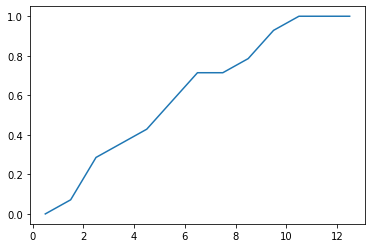

In [285]:
plt.plot(bintemp_mean,b)

In [34]:
te = np.interp(10.5,bintemp_mean,b)

In [35]:
te

1.0

## stats.cumfreq计算cdf

In [277]:
a = np.array([1,2,2.5,2,3,4,5,5,6,6,8,9,9,10])
bintemp = np.arange(1,14)
res = stats.cumfreq(a,15)


In [182]:
res.lowerlimit

0.6785714285714286

In [183]:
res.binsize

0.6428571428571428

In [187]:
q = res.cumcount

In [188]:
b_new = q/ q[-1]

In [189]:
b_new[-1]

1.0

## zform cdf 

In [36]:
total_cdf = [[]for _ in range(80)]
# bins = [[]for _ in range(80)]
for i in range(1,80):
    info = np.array(total_bin[i])
    hist = np.histogram(info[:,1],bin_red)
    hist_temp = hist[0]
#     hist_bins = hist[1]
    cdf = np.cumsum(hist_temp)/sum(hist_temp)
    total_cdf[i].append(cdf)
#     bins[i].append(hist_bins)

In [54]:
bin_red[1:]

array([ 0.210122,  0.210244,  0.210366, ..., 12.409756, 12.409878,
       12.41    ])

In [38]:
hist[1][1:]

array([ 0.210122,  0.210244,  0.210366, ..., 12.409756, 12.409878,
       12.41    ])

In [55]:
red_bin_mean

array([ 0.210061,  0.210183,  0.210305, ..., 12.409695, 12.409817,
       12.409939])

In [40]:
total_cdf[1][0]

array([0., 0., 0., ..., 1., 1., 1.])

In [41]:
np.max(total_cdf[1][0])

1.0

In [42]:
np.min((total_cdf[1][0]))

0.0

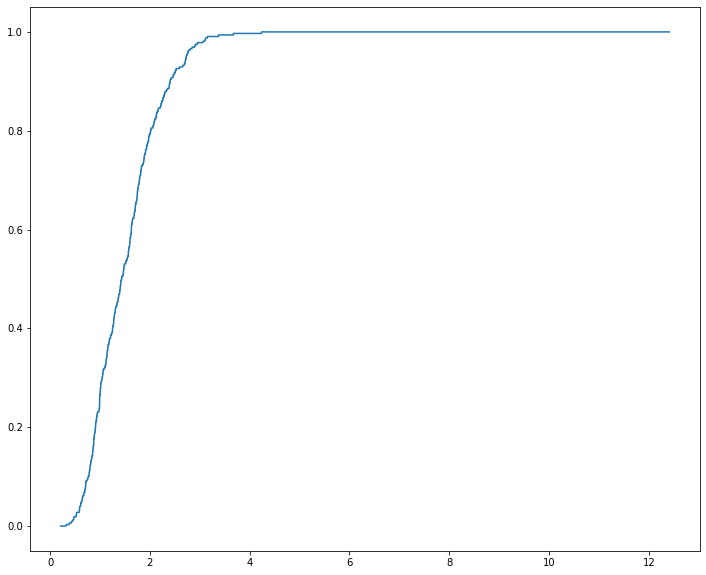

In [213]:
plt.figure(figsize=(12,10))
plt.plot(red_bin_mean,total_cdf[2][0],label = '$%s \ <\ M_{r} <\ %s$'%(mag_bin_new[i-1],mag_bin_new[i]))

In [43]:
cdf_zform = np.zeros(len(vpeak))
for n in range(len(vpeak)):
    cdf_zform[n] = np.interp(zform[n],red_bin_mean,total_cdf[inds[n]][0])

In [62]:
np.max(np.array(total_bin[2])[:,1])

4.236858129797444

In [63]:
np.max(np.array(total_bin[1])[:,1])

3.898489850024956

In [357]:
np.where(np.array(total_bin[2])[:,1] ==4.236858129797444)

(array([56]),)

In [46]:
np.where(total_cdf[2][0]==1.0)

(array([33007, 33008, 33009, ..., 99997, 99998, 99999]),)

In [402]:
bins[1][0][33007]

4.236853999999999

In [332]:
total_cdf[1][0][30233]

1.0

### 由于红移bin取中间值，故red_bin_mean不确定最后等于1的zform所在区间

In [321]:
np.interp(3.898489850024956,red_bin_mean,total_cdf[1][0])

1.0

In [401]:
red_bin_mean[33006]

4.236793

In [400]:
red_bin_mean[33007]

4.236915

In [351]:
bin_red

array([ 0.21    ,  0.210122,  0.210244, ..., 12.409756, 12.409878,
       12.41    ])

In [195]:
np.min(cdf_zform)

1.0365037176271014e-07

In [67]:
np.min(cdf_zform)

9.156009856785694e-07

In [353]:
np.max(cdf_zform)

1.0

In [66]:
np.max(cdf_zform)

1.0

In [185]:
np.where(cdf_zform ==np.min(cdf_zform))

(array([2111957]),)

In [65]:
np.where(cdf_zform ==np.max(cdf_zform))

(array([13363129, 13363130, 13694794, 14846064, 17942857, 18185752,
        19012508, 20341237, 20484724, 21409223, 21681947, 21781435,
        21799057, 22089677, 22300551, 22789609, 23625294, 23803840,
        23899645, 24262711, 24286062, 24305968, 24871766, 24878575,
        24915372, 24999582, 25005658, 25076073, 25103401, 25138369,
        25147412, 25174681, 25181053, 25191897, 25202177, 25243447,
        25264546, 25446240, 25481085, 25746998, 25779539, 25906733,
        25929780, 26003638, 26029654, 26125611, 26135881, 26202136,
        26240253]),)

In [188]:
zform[24878575]

12.232608340845307

In [189]:
inds[24878575]

48

In [190]:
cdf_zform[24878575]

0.999999928032059

In [197]:
cdf_zform[2111957]

1.0365037176271014e-07

In [196]:
mag[2111957]

-16.709252518677555

In [187]:
mag[24878575]

-18.20749817817565

In [222]:
np.interp(zform[25005658],red_bin_mean,total_cdf[inds[25005658]][0])

1.0

In [128]:
total_cdf[41]

array([0., 0., 0., ..., 1., 1., 1.])

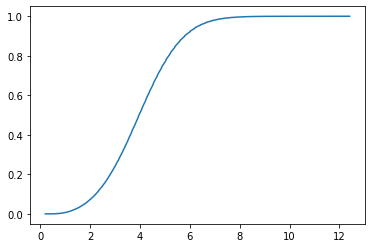

In [132]:
plt.plot(red_bin_mean,total_cdf[41][0])

In [150]:
red_bin_mean[-1536:-1534]

array([12.222669, 12.222791])

In [158]:
total_cdf[41][0][-1]

1.0000000000006632

In [154]:
np.interp(zform[25005658],[12.222669, 12.222791],[1,1])

1.0

In [56]:
from scipy import stats

## 与bin_red[1:]插值结果比较

In [68]:
cdf_zform_check = np.load('/home/yunzheng/mock/color/data/zcdf_new/cdf_zform_3.npy')

In [69]:
np.max(cdf_zform_check)

0.999999928032059

In [70]:
np.min(cdf_zform_check)

1.0365037176271014e-07

# 比较反函数和插值结果

## 定义cdf函数

In [57]:
def blue(M):
    if  M < -26.571428571428571:
        y = 0
        return y
    elif (M < -19.53846153846154):
        y = 0.46 + 0.07 * (M + 20)
        return y
    elif M < -17.1733389977005:
        y = 0.4 + 0.2 * (M + 20)
        return y
    else :
        y = 1 / (1 + np.exp(- (M + 20.5)))
        return y

In [58]:
def mu_blue(M,z):
    y = 0.62 - 0.11 * (M + 20) - 0.25 * (min(z,0.4) - 0.1)
    return y
def sigma_blue(M,z):
    y = 0.12 + 0.02 * (M + 20) + 0.2 * (z - 0.1)
    return y
def mu_red(M,z):
    y = 0.932 - 0.032 * (M + 20) - 0.18 * (min(z,0.4) - 0.1)
    return y
def sigma_red(M,z):
    y = 0.07 + 0.01 * (M + 20) + 0.5 * (z - 0.1) + 0.1 * (z - 0.1)**2
    return y

In [59]:
def cdf(col,M,z):
    y = blue(M) * norm.cdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.cdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [60]:
def pdf(col,M,z):
    y = blue(M) * norm.pdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.pdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

## inversefunc test

In [71]:
# from pynverse import inversefunc
from scipy.stats import norm

In [72]:
z0 =0.2182580231028184

In [244]:

invergau = inversefunc(cdf, args=(-16.709252518677555,z0),accuracy=15)

In [245]:
invergau(1.0365037176271014e-07)

array(-0.85836642)

## np.interp做插值

In [93]:
color = np.linspace(-1.5,2.2,10000000)
distest = cdf(color,-16.709252518677555,0.2182580231028184)

In [94]:
np.interp(0.999999928032059,distest,color)

1.542392927702722

In [164]:
cdf(1.875,-22.5,0.2182580231028184)

1.0

In [141]:
1.0e-16 * 100000000000000

0.01

In [142]:
100000000000000

100000000000000

In [166]:

def binary(MIN,MAX,mag):
    while True:
        MID = 0.5 * (MIN + MAX)
        fun_mid = cdf(MID,mag,z0)
        if (1 - fun_mid) < 1e-40:
            print("The solution is:",end='')
            print(MID)
            break
        else:
            MIN = MID

In [170]:
binary(-1.5,2.1,-15.5)

KeyboardInterrupt: 

In [136]:

color0 = np.linspace(-1.5,2.2,10000000)
def colorassign(mag,cdf_z):
    distest = cdf(color0,mag,z0)
    finalcolor = np.interp(cdf_z,distest,color0)
    return finalcolor

In [141]:
col = np.zeros(26241654)
for count in range(2111957,2111959):
    col[count] = colorassign(mag[count],cdf_zform_check[count])

In [142]:
col[2111957]

-0.8583664176723407

In [143]:
mag[2111957]

-16.709252518677555

In [145]:
cdf_zform_check[2111957]

1.0365037176271014e-07

### 对mag bin做插值

In [83]:
color0 = np.linspace(-1.5,2.2,10000000)

In [95]:
mag_bin_mean.shape

(79,)

In [96]:
cdf_bins = [[] for _ in range(79)]
for n in range(79):
    temp_cdf = cdf(color0, mag_bin_mean[n], z0)
    cdf_bins[n].append(temp_cdf)

In [150]:
cdf_bins[78][0]

array([4.88778223e-11, 4.88783196e-11, 4.88788170e-11, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

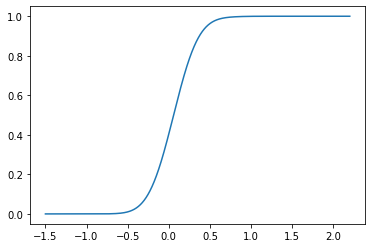

In [92]:
plt.plot(color0,cdf_bins[78][0])

In [102]:
inds.shape

(26241654,)

In [151]:
finalcolor=np.zeros(26241654)
for i in range(26240253,26240255):
    print(inds[i])
    finalcolor[i] = np.interp(cdf_zform_check[i],cdf_bins[inds[i]-1][0],color0)

1
10


In [152]:
finalcolor[26240253]

1.2569365034511966

In [153]:
cdf_zform_check[26240253]

0.9948191397858189

### 对单个mag做插值

In [112]:
color0

array([-1.5       , -1.49999963, -1.49999926, ...,  2.19999926,
        2.19999963,  2.2       ])

In [154]:
def colorassign(mag,cdf_z):
    distest = cdf(color0,mag,z0)
    finalcolor = np.interp(cdf_z,distest,color0)
    return finalcolor

mul_col = np.zeros(26241654)
for i in range(26240253,26240255):
    mul_col[i] = colorassign(mag[i],cdf_zform_check[i])


In [155]:
mul_col[26240253]

1.2550176355390654

In [135]:
mag[2111957]

-16.709252518677555

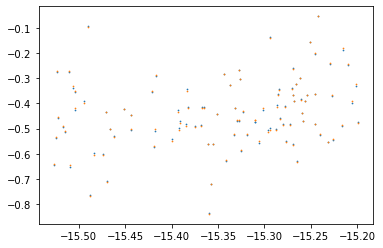

In [130]:
plt.scatter(mag[10000:10100],mul_col,s = 0.5)
plt.scatter(mag[10000:10100],finalcolor,s= 0.5)

# check z_form cdf

In [73]:
z1 = np.load('/home/yunzheng/mock/color/data/zcdf_new/cdf_zform_2.npy')

In [75]:
z2 = np.load('/home/yunzheng/mock/color/data/zcdf_new/cdf_zform_3.npy')

In [250]:
z1.shape

(26241654,)

In [271]:
z2.shape

(26241654,)

In [74]:
z1[4040:4050]

array([0.00097281, 0.00419073, 0.01704272, 0.01090488, 0.01000264,
       0.02125868, 0.08004263, 0.00276913, 0.07008721, 0.03949082])

In [76]:
z2[4040:4050]

array([0.0009049 , 0.0041832 , 0.01639717, 0.01047465, 0.00997016,
       0.02106821, 0.08242734, 0.00277313, 0.07214228, 0.04070824])

In [287]:
z2[4040:4050]

array([0.0009049 , 0.0041832 , 0.01639717, 0.01047465, 0.00997016,
       0.02106821, 0.08242734, 0.00277313, 0.07214228, 0.04070824])

In [77]:
cdf_zform[4040:4050]

array([0.00112713, 0.00418436, 0.01694143, 0.01083648, 0.01006232,
       0.02165076, 0.08246466, 0.00277432, 0.07217662, 0.04110264])

# color comparison between theory and mock

In [31]:
import numpy as np
from scipy.stats import norm

In [3]:
color = np.load('/home/yunzheng/mock/color/data/zcdf_new/color_mul_interp.npy')

In [4]:
color[:10]

array([-0.73198615, -0.68474536, -0.51660745, -0.77605616, -0.66200555,
       -0.7318218 , -0.77597172, -0.77459834, -0.52508325, -0.66211432])

In [5]:
np.max(color)

1.5945069420331515

In [6]:
np.min(color)

-0.9524718977761165

## Gaussian components

### Two Gaussian Function

In [29]:
def blue(M):
    if  M < -26.571428571428571:
        y = 0
        return y
    elif (M < -19.53846153846154):
        y = 0.46 + 0.07 * (M + 20)
        return y
    elif M < -17.1733389977005:
        y = 0.4 + 0.2 * (M + 20)
        return y
    else :
        y = 1 / (1 + np.exp(- (M + 20.5)))
        return y

In [7]:
def mu_blue(M,z):
    y = 0.62 - 0.11 * (M + 20) - 0.25 * (min(z,0.4) - 0.1)
    return y
def sigma_blue(M,z):
    y = 0.12 + 0.02 * (M + 20) + 0.2 * (z - 0.1)
    return y
def mu_red(M,z):
    y = 0.932 - 0.032 * (M + 20) - 0.18 * (min(z,0.4) - 0.1)
    return y
def sigma_red(M,z):
    y = 0.07 + 0.01 * (M + 20) + 0.5 * (z - 0.1) + 0.1 * (z - 0.1)**2
    return y

In [8]:
def cdf(col,M,z):
    y = blue(M) * norm.cdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.cdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [9]:
def pdf(col,M,z):
    y = blue(M) * norm.pdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.pdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [10]:
z0 = 0.2182580231028184

## mock data

In [20]:
mag_sta = [[]for _ in range(80)]
color_sta = [[]for _ in range(80)]
for n in range(len(mag)):
    mag_sta[inds[n]].append(mag[n])
    color_sta[inds[n]].append(color[n])

In [54]:
color_bin = np.arange(-1.0,1.8,0.025)

In [45]:
mag_sta[2][:10]

[-22.809463037303455,
 -22.805088910744548,
 -22.924820807849265,
 -22.811309659028854,
 -22.87954004396784,
 -22.866332824179757,
 -22.88903279980583,
 -22.910725768148946,
 -22.803659838376827,
 -22.847945556898924]

In [24]:

# color_23 = color_sta[]
color_22 = color_sta[10] + color_sta[11]
color_21 = color_sta[20] + color_sta[21]
color_20 = color_sta[30] + color_sta[31]
color_19 = color_sta[40] + color_sta[41]
color_18 = color_sta[50] + color_sta[51]
color_17 = color_sta[60] + color_sta[61]
color_16 = color_sta[70] + color_sta[71]

In [50]:
mag16 = np.histogram(color_16,color_bin,density = True)
mag17 = np.histogram(color_17,color_bin,density = True)
mag18 = np.histogram(color_18,color_bin,density = True)
mag19 = np.histogram(color_19,color_bin,density = True)
mag20 = np.histogram(color_20,color_bin,density = True)
mag21 = np.histogram(color_21,color_bin,density = True)
mag22 = np.histogram(color_22,color_bin,density = True)
# mag23 = np.histogram(color_23,color_bin,density = True)

## Theory comparison

In [56]:
pdf_theory = [[]for _ in range(8)]
for i in range(8):
    pdf_theory[i] = pdf(color_bin,-16-i,z = z0)

In [59]:
color_bin_new = 0.5 * (color_bin[1:]+color_bin[:-1])

In [60]:
color_bin_new.shape

(111,)

[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, '')]

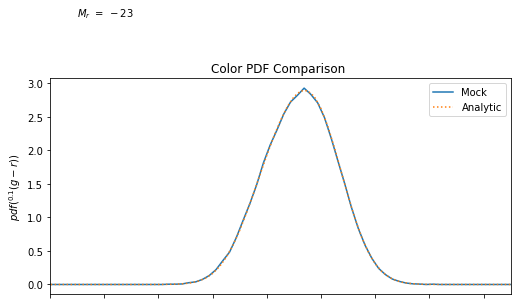

In [61]:
fig = plt.figure(figsize=(8,12))
frame1 = fig.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
# plt.hist(color_22,color_bin,density=True,label='hist')
plt.plot(color_bin,pdf_theory[6],label = 'Analytic',linestyle = ':')
plt.text(0.1,4,'$M_{r} \ = \ -23$',fontsize = 10)
plt.xlim(0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

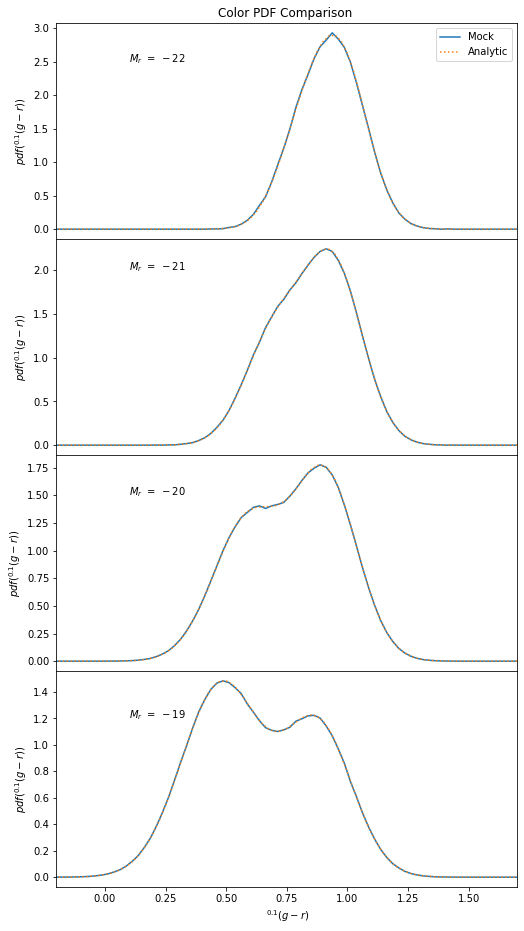

In [89]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[6],label = 'Analytic',linestyle = ':')
plt.text(0.1,2.5,'$M_{r} \ = \ -22$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.5,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag21[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[5],label = 'Analytic',linestyle = ':')
plt.text(0.1,2.,'$M_{r} \ = \ -21$',fontsize = 10)
plt.xlim(-0.2,1.7)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.25,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag20[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[4],label = 'Analytic',linestyle = ':')
plt.text(0.1,1.5,'$M_{r} \ = \ -20$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame3.set_xticklabels([])


frame4 = fig2.add_axes((.1,.0,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag19[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[3],label = 'Analytic',linestyle = ':')
plt.text(0.1,1.2,'$M_{r} \ = \ -19$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')


plt.xlabel(r' $^{0.1}(g-r)$ ')

plt.savefig('/home/yunzheng/mock/color/picture/colorassign20_new_new_new.pdf',dpi = 100)

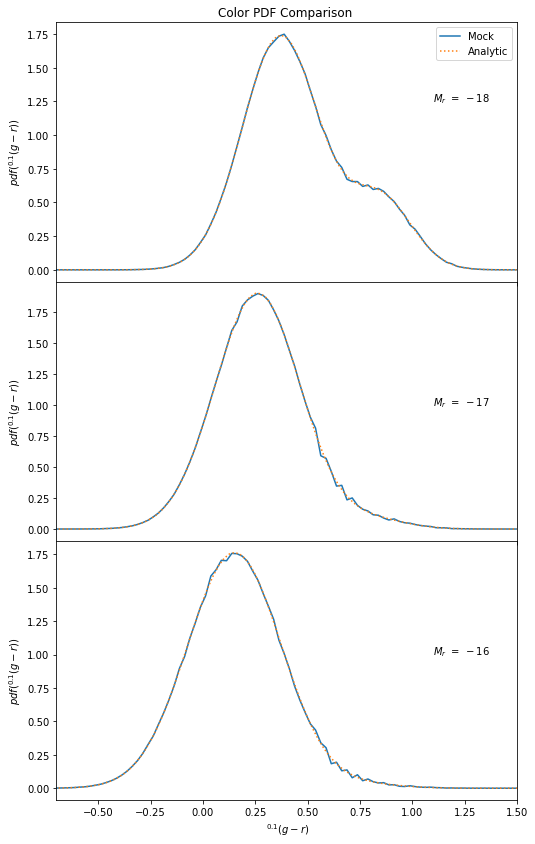

In [94]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.65,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag18[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[2],label = 'Analytic',linestyle = ':')
plt.text(1.1,1.25,'$M_{r} \ = \ -18$',fontsize = 10)
plt.xlim(-0.7,1.5)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.35,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag17[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[1],label = 'Analytic',linestyle = ':')
plt.text(1.1,1.,'$M_{r} \ = \ -17$',fontsize = 10)
plt.xlim(-0.7,1.5)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.05,.8,.3))
ax = plt.gca()
plt.plot(color_bin_new,mag16[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[0],label = 'Analytic',linestyle = ':')
plt.text(1.1,1,'$M_{r} \ = \ -16$',fontsize = 10)
plt.xlim(-0.7,1.5)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
plt.xlabel(r' $^{0.1}(g-r)$ ')

plt.savefig('/home/yunzheng/mock/color/picture/colorassign16_new_new_new.pdf',dpi = 100)

## 用新的magbin比较

In [64]:
mag_bin_new2 = np.arange(-23.5,-14.9,0.2)

In [65]:
mag_bin_new2.shape

(43,)

In [66]:
inds_new = np.digitize(mag,mag_bin_new2)

In [67]:
mag_sta2 = [[]for _ in range(43)]
color_sta2 = [[]for _ in range(43)]
for n in range(len(mag)):
    mag_sta2[inds_new[n]].append(mag[n])
    color_sta2[inds_new[n]].append(color[n])

In [68]:
pdf_test16 = pdf(color_bin,-16,z = 0.2182580231028184)
pdf_test17 = pdf(color_bin,-17,z = 0.2182580231028184)
pdf_test18 = pdf(color_bin,-18,z = 0.2182580231028184)
pdf_test19 = pdf(color_bin,-19,z = 0.2182580231028184)
pdf_test20 = pdf(color_bin,-20,z = 0.2182580231028184)
pdf_test21 = pdf(color_bin,-21,z = 0.2182580231028184)
pdf_test22 = pdf(color_bin,-22,z = 0.2182580231028184)
pdf_test23 = pdf(color_bin,-23,z = 0.2182580231028184)

In [69]:
print(np.min(color_sta[23]))
print(np.max(color_sta[23]))

0.08370150010360003
1.4846435551805888


In [70]:
color_bin.shape

(112,)

In [71]:
mag16 = np.histogram(color_sta2[38],color_bin,density = True)
mag17 = np.histogram(color_sta2[33],color_bin,density = True)
mag18 = np.histogram(color_sta2[28],color_bin,density = True)
mag19 = np.histogram(color_sta2[23],color_bin,density = True)
mag20 = np.histogram(color_sta2[18],color_bin,density = True)
mag21 = np.histogram(color_sta2[13],color_bin,density = True)
mag22 = np.histogram(color_sta2[8],color_bin,density = True)
mag23 = np.histogram(color_sta2[3],color_bin,density = True)

Text(0.5, 0, ' $^{0.1}(g-r)$ ')

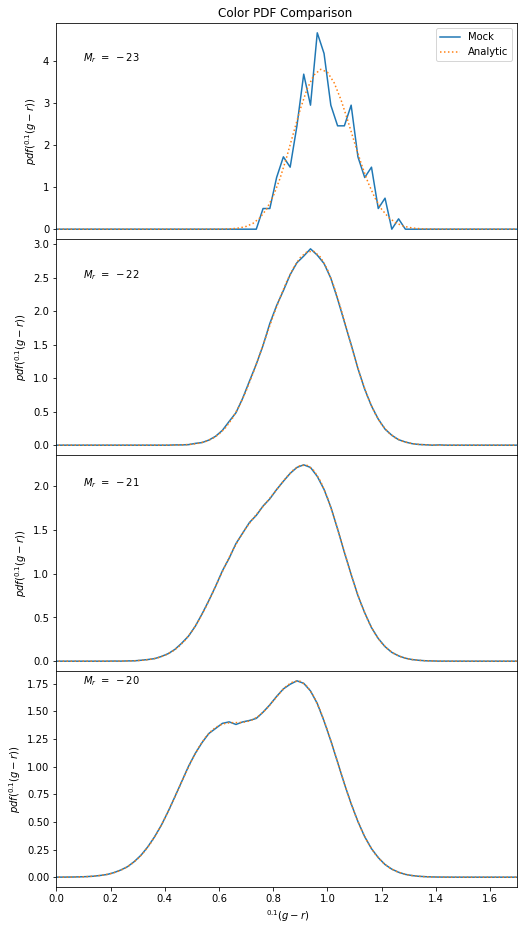

In [72]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag23[0],label = 'Mock')
plt.plot(color_bin,pdf_test23,label = 'Analytic',linestyle = ':')
plt.text(0.1,4,'$M_{r} \ = \ -23$',fontsize = 10)
plt.xlim(0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.5,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
plt.plot(color_bin,pdf_test22,label = 'Analytic',linestyle = ':')
plt.text(0.1,2.5,'$M_{r} \ = \ -22$',fontsize = 10)
plt.xlim(0,1.7)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.25,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag21[0],label = 'Mock')
plt.plot(color_bin,pdf_test21,label = 'Analytic',linestyle = ':')
plt.text(0.1,2,'$M_{r} \ = \ -21$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame3.set_xticklabels([])


frame4 = fig2.add_axes((.1,.0,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag20[0],label = 'Mock')
plt.plot(color_bin,pdf_test20,label = 'Analytic',linestyle = ':')
plt.text(0.1,1.75,'$M_{r} \ = \ -20$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')


plt.xlabel(r' $^{0.1}(g-r)$ ')

# plt.savefig('/home/yunzheng/mock/color/picture/colorassign20_new.pdf',dpi = 100)

Text(0.5, 0, ' $^{0.1}(g-r)$ ')

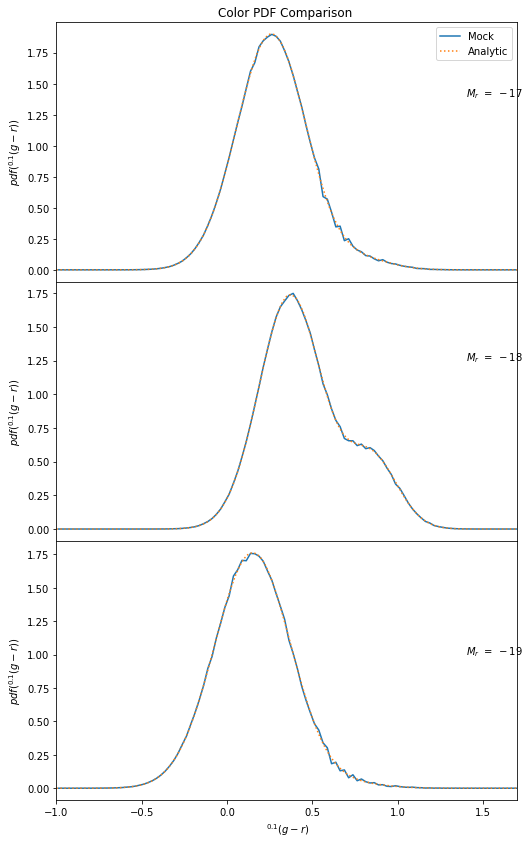

In [74]:
fig2 = plt.figure(figsize=(8,12))
frame1 = fig2.add_axes((.1,.65,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag17[0],label = 'Mock')
plt.plot(color_bin,pdf_test17,label = 'Analytic',linestyle = ':')
plt.text(1.4,1.4,'$M_{r} \ = \ -17$',fontsize = 10)
plt.xlim(-1.0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.35,.8,.3))
ax = plt.gca()

plt.plot(color_bin_new,mag18[0],label = 'Mock')
plt.plot(color_bin,pdf_test18,label = 'Analytic',linestyle = ':')
plt.text(1.4,1.25,'$M_{r} \ = \ -18$',fontsize = 10)
plt.xlim(-1.0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])


frame3 = fig2.add_axes((.1,.05,.8,.3))
ax = plt.gca()
plt.plot(color_bin_new,mag16[0],label = 'Mock')
plt.plot(color_bin,pdf_test16,label = 'Analytic',linestyle = ':')
plt.text(1.4,1,'$M_{r} \ = \ -19$',fontsize = 10)
plt.xlim(-1.0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
plt.xlabel(r' $^{0.1}(g-r)$ ')

# plt.savefig('/home/yunzheng/mock/color/picture/colorassign17_new.pdf',dpi = 100)

# color-mag distribution

In [76]:
import matplotlib as mpl

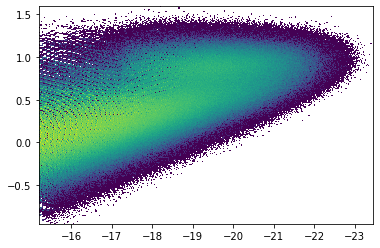

In [78]:
plt.hist2d(mag,color,bins = 1000,norm = mpl.colors.LogNorm())
plt.gca().invert_xaxis()
# plt.xlim(-17.5,-23)
# plt.ylim(-5,5.5)

Text(0.5, 1.0, 'color distribution')

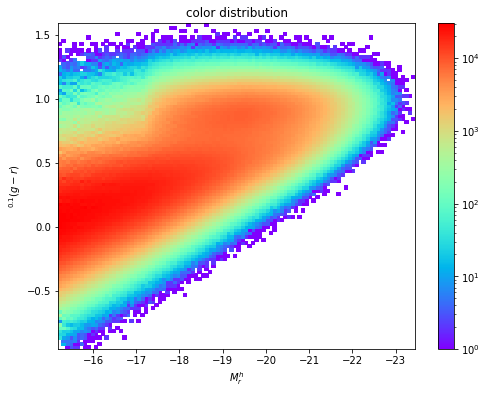

In [106]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

counts,xbins,ybins,image = plt.hist2d(mag,color,bins = 100,norm = mpl.colors.LogNorm(),cmap = plt.cm.rainbow)
# plt.contour(xbins[1:],ybins[1:],counts.transpose(),extent = [-22,-16.5,-1,1.5],linewidths=2)

plt.gca().invert_xaxis()

# plt.xlim(-17.5,-23)
# plt.ylim(-0.5,1.5)
plt.colorbar()
# ax.set_aspect(np.diff(plt.get_xlim())/np.diff(plt.get_ylim()))
# ax.set_aspect('equal')

plt.xlabel('$M_{r}^{h}$')
plt.ylabel('$^{0.1}(g-r)$')
plt.title('color distribution')
# plt.savefig('/home/yunzheng/mock/color/picture/color_distribution_new.pdf',dpi = 100,metadata = {'Comment':"color distribution to mag"})

In [116]:
counts[-5]

array([2.0000e+00, 1.0000e+00, 6.0000e+00, 7.0000e+00, 1.0000e+01,
       1.0000e+01, 2.9000e+01, 2.1000e+01, 4.2000e+01, 7.3000e+01,
       8.1000e+01, 1.3000e+02, 1.8600e+02, 2.7500e+02, 3.5700e+02,
       5.2000e+02, 6.8000e+02, 8.9900e+02, 1.1820e+03, 1.5990e+03,
       2.0280e+03, 2.5970e+03, 3.3100e+03, 4.1590e+03, 5.1670e+03,
       5.8980e+03, 7.4510e+03, 9.0620e+03, 1.0445e+04, 1.2309e+04,
       1.3818e+04, 1.5584e+04, 1.7822e+04, 2.0363e+04, 2.0878e+04,
       2.3229e+04, 2.5190e+04, 2.5852e+04, 2.6667e+04, 2.9409e+04,
       2.8810e+04, 2.8109e+04, 2.8497e+04, 2.8152e+04, 2.7253e+04,
       2.6098e+04, 2.4613e+04, 2.3136e+04, 2.1932e+04, 1.9180e+04,
       1.7840e+04, 1.6422e+04, 1.3401e+04, 1.2345e+04, 1.0777e+04,
       7.2590e+03, 8.3640e+03, 6.7390e+03, 4.9570e+03, 4.0760e+03,
       3.6880e+03, 2.8740e+03, 2.1350e+03, 1.4470e+03, 1.7960e+03,
       9.0200e+02, 1.1940e+03, 5.0500e+02, 9.4600e+02, 2.6100e+02,
       7.1900e+02, 4.1400e+02, 3.2700e+02, 3.1600e+02, 1.4200e

In [119]:
xbins[5:].shape

(96,)

<ipython-input-129-b5a087bb519b>:18: UserWarning: Unknown infodict keyword: Comment
  plt.savefig('/home/yunzheng/mock/color/picture/color_distributioncontour_new.pdf',dpi = 100,metadata = {'Comment':"color distribution to mag"})


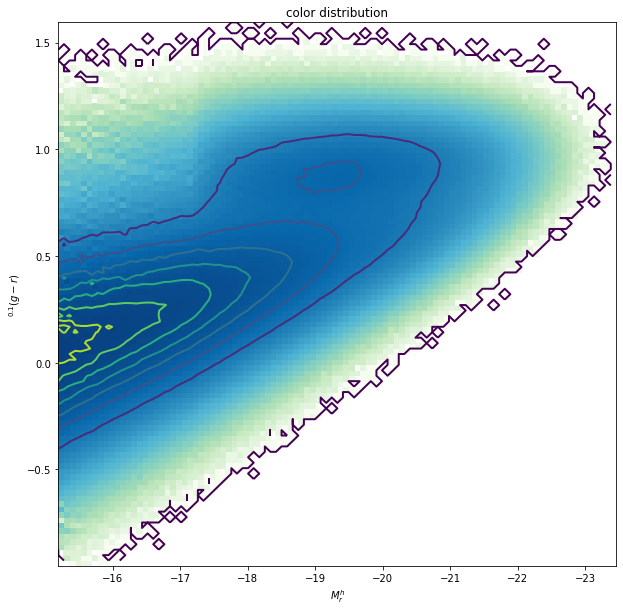

In [129]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

counts,xbins,ybins,image = plt.hist2d(mag,color,bins = 100,norm = mpl.colors.LogNorm(),cmap = plt.cm.GnBu)
plt.contour(xbins[1:],ybins[1:],counts.transpose(),linewidths=2)

plt.gca().invert_xaxis()

# plt.xlim(-17.5,-23)
# plt.ylim(-0.5,1.5)
# plt.colorbar()
# ax.set_aspect(np.diff(plt.get_xlim())/np.diff(plt.get_ylim()))
# ax.set_aspect('equal')

plt.xlabel('$M_{r}^{h}$')
plt.ylabel('$^{0.1}(g-r)$')
plt.title('color distribution')
plt.savefig('/home/yunzheng/mock/color/picture/color_distributioncontour_new.pdf',dpi = 100,metadata = {'Comment':"color distribution to mag"})

# color data double check

In [131]:
color2 = np.load('/home/yunzheng/mock/color/data/zcdf_new/color_mul_normal.npy')

In [132]:
color_dev = color - color2

In [133]:
color_dev

array([0., 0., 0., ..., 0., 0., 0.])

In [134]:
color2.shape

(26241654,)

In [135]:
color

array([-0.73198615, -0.68474536, -0.51660745, ...,  0.92147587,
        1.104208  ,  0.8979283 ])

In [136]:
color2

array([-0.73198615, -0.68474536, -0.51660745, ...,  0.92147587,
        1.104208  ,  0.8979283 ])

In [137]:
np.min(color2)

-0.9524718977761165

In [140]:
np.min(color)

-0.9524718977761165

In [138]:
np.max(color)

1.5945069420331515

In [139]:
np.max(color2)

1.5945069420331515